In [1]:
import numpy as np
np.random.seed(888)

In [2]:
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import model_to_dot
from keras.callbacks.callbacks import EarlyStopping

Using TensorFlow backend.


## Read train, valid, test data set

In [3]:
train_data = np.load("data/train_data.npy")
train_label = np.load("data/train_label.npy")

valid_data = np.load("data/valid_data.npy")
valid_label = np.load("data/valid_label.npy")

test_data = np.load("data/test_data.npy")
test_label = np.load("data/test_label.npy")

In [4]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

## Neural Network 1

In [5]:
model_1 = Sequential()
model_1.add(Dense(4, input_shape=(2304,)))
model_1.add(Activation('softmax'))
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

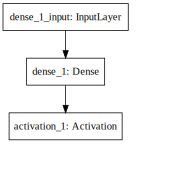

In [6]:
SVG(model_to_dot(model_1).create(prog='dot', format='svg'))

In [7]:
history_1 = model_1.fit(x = train_data, y = train_label, 
                        validation_data = (valid_data, valid_label),
                        callbacks = [monitor],
                        epochs = 50, batch_size = 128, 
                        shuffle = True)

Train on 105697 samples, validate on 13213 samples
Epoch 1/50
105697/105697 [==============================] - 2s 14us/step - loss: 1.0453 - accuracy: 0.5541 - val_loss: 0.9755 - val_accuracy: 0.5753
Epoch 2/50
105697/105697 [==============================] - 2s 15us/step - loss: 0.9706 - accuracy: 0.5783 - val_loss: 0.9612 - val_accuracy: 0.5823
Epoch 3/50
105697/105697 [==============================] - 1s 13us/step - loss: 0.9602 - accuracy: 0.5839 - val_loss: 0.9561 - val_accuracy: 0.5859
Epoch 4/50
105697/105697 [==============================] - 2s 15us/step - loss: 0.9550 - accuracy: 0.5863 - val_loss: 0.9539 - val_accuracy: 0.5877
Epoch 5/50
105697/105697 [==============================] - 2s 15us/step - loss: 0.9514 - accuracy: 0.5889 - val_loss: 0.9528 - val_accuracy: 0.5883
Epoch 6/50
105697/105697 [==============================] - 2s 15us/step - loss: 0.9487 - accuracy: 0.5902 - val_loss: 0.9524 - val_accuracy: 0.5890
Epoch 7/50
105697/105697 [=============================

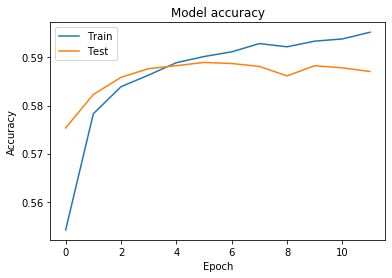

In [8]:
# Plot training & validation accuracy values
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

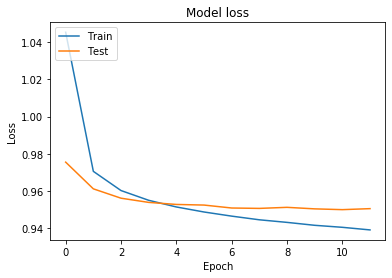

In [9]:
# Plot training & validation loss values
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Neural Network 2

In [10]:
model_2 = Sequential()
model_2.add(Dense(128, input_shape=(2304,), activation='tanh'))
model_2.add(Dense(4))
model_2.add(Activation('softmax'))
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

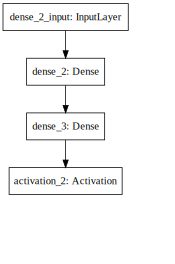

In [11]:
SVG(model_to_dot(model_2).create(prog='dot', format='svg'))

In [12]:
history_2 = model_2.fit(x = train_data, y = train_label, 
                        validation_data = (valid_data, valid_label),
                        callbacks = [monitor],
                        epochs = 50, batch_size = 128, 
                        shuffle = True)

Train on 105697 samples, validate on 13213 samples
Epoch 1/50
105697/105697 [==============================] - 4s 35us/step - loss: 0.9817 - accuracy: 0.5717 - val_loss: 0.9703 - val_accuracy: 0.5777
Epoch 2/50
105697/105697 [==============================] - 4s 33us/step - loss: 0.9555 - accuracy: 0.5858 - val_loss: 0.9545 - val_accuracy: 0.5844
Epoch 3/50
105697/105697 [==============================] - 3s 33us/step - loss: 0.9486 - accuracy: 0.5898 - val_loss: 0.9551 - val_accuracy: 0.5841
Epoch 4/50
105697/105697 [==============================] - 4s 34us/step - loss: 0.9449 - accuracy: 0.5926 - val_loss: 0.9571 - val_accuracy: 0.5829
Epoch 5/50
105697/105697 [==============================] - 4s 33us/step - loss: 0.9429 - accuracy: 0.5931 - val_loss: 0.9541 - val_accuracy: 0.5859
Epoch 6/50
105697/105697 [==============================] - 3s 33us/step - loss: 0.9405 - accuracy: 0.5939 - val_loss: 0.9591 - val_accuracy: 0.5825
Epoch 7/50
105697/105697 [=============================

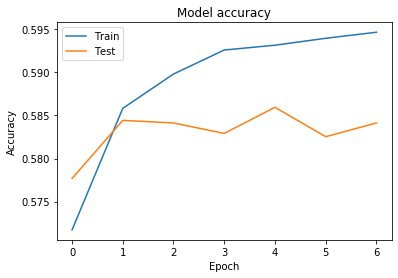

In [13]:
# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

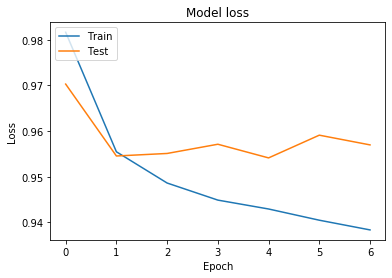

In [14]:
# Plot training & validation loss values
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Neural Network 3

In [15]:
model_3 = Sequential()
model_3.add(Dense(128, input_shape=(2304,), activation='tanh'))
model_3.add(Dropout(0.5))
model_3.add(Dense(4))
model_3.add(Activation('softmax'))
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

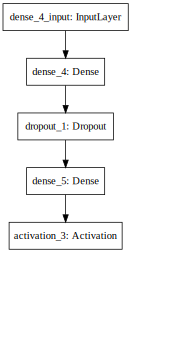

In [16]:
SVG(model_to_dot(model_3).create(prog='dot', format='svg'))

In [17]:
history_3 = model_3.fit(x = train_data, y = train_label, 
                        validation_data = (valid_data, valid_label),
                        callbacks = [monitor],
                        epochs = 50, batch_size = 128, 
                        shuffle = True)

Train on 105697 samples, validate on 13213 samples
Epoch 1/50
105697/105697 [==============================] - 4s 37us/step - loss: 0.9931 - accuracy: 0.5676 - val_loss: 0.9615 - val_accuracy: 0.5819
Epoch 2/50
105697/105697 [==============================] - 3s 32us/step - loss: 0.9667 - accuracy: 0.5804 - val_loss: 0.9542 - val_accuracy: 0.5839
Epoch 3/50
105697/105697 [==============================] - 4s 33us/step - loss: 0.9602 - accuracy: 0.5850 - val_loss: 0.9542 - val_accuracy: 0.5858
Epoch 4/50
105697/105697 [==============================] - 4s 33us/step - loss: 0.9567 - accuracy: 0.5865 - val_loss: 0.9533 - val_accuracy: 0.5876
Epoch 5/50
105697/105697 [==============================] - 4s 34us/step - loss: 0.9543 - accuracy: 0.5886 - val_loss: 0.9572 - val_accuracy: 0.5838
Epoch 6/50
105697/105697 [==============================] - 3s 33us/step - loss: 0.9515 - accuracy: 0.5895 - val_loss: 0.9591 - val_accuracy: 0.5801
Epoch 7/50
105697/105697 [=============================

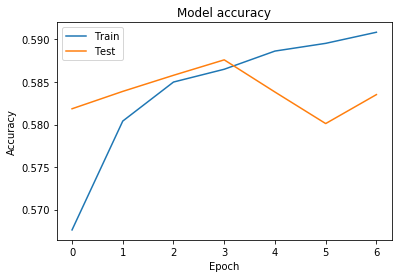

In [18]:
# Plot training & validation accuracy values
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

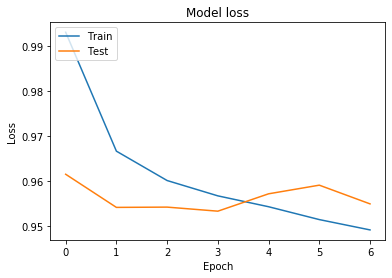

In [19]:
# Plot training & validation loss values
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model selection

Choose model 1 as the final model becasuse it has highest validation accuracy (58.71%)

## Error Analysis

In [20]:
from sklearn.metrics import confusion_matrix
from bokeh.io import show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [21]:
labels = ["😂", "😊", "😒", "😭"] 
pred = model_1.predict(valid_data)
y_true = np.argmax(valid_label, axis = 1)
y_pred = np.argmax(pred, axis = 1)
confusion_matrix_result = confusion_matrix(y_true, y_pred)

In [22]:
def plot_confusion_matrix(labels, confusion_matrix_result):
    print("Confusion matrix:")
    print(confusion_matrix_result)
    num_max = np.max(confusion_matrix_result)
    #num_min = np.min(confusion_matrix_result)
    num_min = 0
    xname = []
    yname = []
    color = []
    alpha = []
    count = []

    for i, label_1 in enumerate(labels):
        for j, label_2 in enumerate(labels):
            xname.append(label_1)
            yname.append(label_2)
            color.append('#008000')
            alpha.append((confusion_matrix_result[j, i] - num_min) / (num_max - num_min))
            count.append(confusion_matrix_result[j, i])

    data = dict(
        xname = xname,
        yname = yname,
        colors = color,
        alphas = alpha,
        count = count,
    )

    p = figure(title = "Confusion Matrix",
               x_axis_location = "below", tools = "hover, save",
               x_range = labels, 
               y_range=list(reversed(labels)),
               tooltips = [('True Label', '@yname'), 
                           ('Predicted Label', '@xname'),
                           ('Count', '@count')])

    p.plot_width = 400
    p.plot_height = 400
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "15pt"
    p.axis.major_label_standoff = 0
    p.xaxis.axis_label = 'Predicted Label'
    p.yaxis.axis_label = 'True Label'
    
    p.rect('xname', 'yname', 0.9, 0.9, source = data,
           color =  'colors', alpha = 'alphas', line_color = None,
           hover_line_color = 'black', hover_color = 'colors', 
           hover_alpha = 'alphas')

    show(p, notebook_handle= True) # show the plot

In [23]:
plot_confusion_matrix(labels, confusion_matrix_result)

Confusion matrix:
[[1652  482  452  569]
 [ 511 2513  156  301]
 [ 602  196 1505  546]
 [ 702  418  521 2087]]


## Show mislabelled examples

In [48]:
import pandas as pd

In [47]:
valid_index = np.load("data/valid_index.npy")
predict_index = np.concatenate((valid_index, y_pred.reshape(y_pred.shape[0], 1)), axis = 1)
miss_predict_index = predict_index[y_true != y_pred]
print("{} out of {} tweets are mispredicted in validation set".format(miss_predict_index.shape[0], 
                                                                      predict_index.shape[0]))

5456 out of 13213 tweets are mispredicted in validation set


In [49]:
df_0 = pd.read_csv("data/clean/positive.csv", encoding= "utf-8")
df_1 = pd.read_csv("data/clean/slightly_positive.csv", encoding= "utf-8")
df_2 = pd.read_csv("data/clean/slightly_negative.csv", encoding= "utf-8")
df_3 = pd.read_csv("data/clean/negative.csv", encoding= "utf-8")

In [66]:
def show_example(index_list, labels):
    idx = index_list[0]
    label_true = index_list[1]
    label_mispredict = index_list[2]
    if label_true == 0:
        text = df_0.text[idx]
    elif label_true == 1:
        text = df_1.text[idx]
    elif label_true == 2:
        text = df_2.text[idx]
    elif label_true == 3:
        text = df_3.text[idx]
    print("Predict: {}\tTrue: {}\nText: {}".format(labels[label_mispredict], labels[label_true], text))
    print("---------------------------------------------------------")

In [67]:
for i in np.random.choice(len(miss_predict_index), 30, replace=False):
    show_example(miss_predict_index[i], labels)

Predict: 😭	True: 😒
Text: i downloaded her album, and got bored ndingekafiki naku track 5 😒
---------------------------------------------------------
Predict: 😂	True: 😭
Text: @arubaology yes yall do djdjdjdjdj the us aau teams stay playing canadian ones 😭
---------------------------------------------------------
Predict: 😒	True: 😂
Text: Nonsense.....  kwankara is a tribal ethnic group
does it put ants in your pants? 😂 https://t.co/wGXLeS1fAL
---------------------------------------------------------
Predict: 😂	True: 😊
Text: rochelleniehues was doing a Guessing Game And I Won 😊 https://t.co/cchGJm9DFj
---------------------------------------------------------
Predict: 😭	True: 😒
Text: my ppls have it hot asf in here ..let me turn my air on 😒
---------------------------------------------------------
Predict: 😭	True: 😂
Text: Idc if us bitches be roastin each other I️ just appreciate that they let each other finish 😂 https://t.co/LsvkZHm7V8
-----------------------------------------------------